In [34]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [29]:
data = pd.read_csv('train/train.csv')

In [30]:
data

,Text,Class
0,I do.,0
1,What if anything was decided about whether I s...,0
2,H: If Roubini is right and he's been mostly ri...,0
3,HRC: Below is an oped on the National Security...,0
4,DQoNCg0KDQoNCg0KDQpHb29kIERheSwNCk1heSBpdCBub3...,1
...,...,...
9538,Assume jake and pir talked to u about,0
9539,Experience in Southeast Asia [John Carland]below,0
9540,ATTN=3AC=2EE=2EO=2FPRESIDENT=2E I know this me...,1
9541,"Dear Friend,How are you doing? I would be very...",1


In [31]:
px.bar(data['Class'].value_counts(), title='number of class in data')

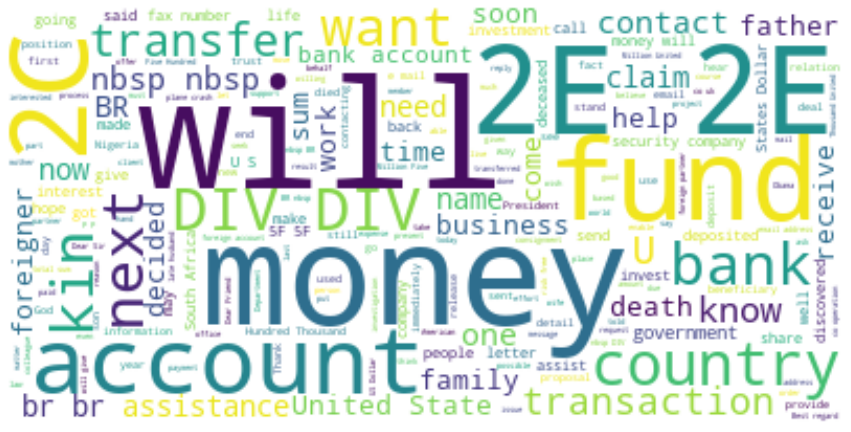

In [32]:
#word cloud
data['Text'] = data['Text'].astype(str)
text = " ".join(i for i in data['Text'])
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/aaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
len(data)

9543

In [45]:
data.dropna(inplace=True)
data = data.sample(7000, random_state=42)

In [47]:
#train_test spilit
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Class'], test_size =0.2)

In [48]:
def process_text(text):
  #1-remove puncuation
  #2-remove stopwords
  
  nopunc = [word for word in text if word not in string.punctuation]

  nopunc = ''.join(nopunc)

  clean_word = [word for word in nopunc.split() if word .lower() not in stopwords.words('english')]

  return clean_word

In [49]:
#vactor of clean Words of texts
message_bow = CountVectorizer(analyzer=process_text).fit_transform(pd.concat([X_train, X_test]))

In [50]:
message_bow.shape

(7000, 105422)

In [51]:
#ML Modeling
rfc = RandomForestClassifier().fit(message_bow.toarray()[:len(X_train)], y_train)
y_pred = rfc.predict(message_bow.toarray()[len(X_train):])

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       769
           1       0.97      0.93      0.95       631

    accuracy                           0.95      1400
   macro avg       0.95      0.95      0.95      1400
weighted avg       0.95      0.95      0.95      1400

